### Importing the libraries

In [82]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [33]:
df.columns = [cols.lower() for cols in df.columns]

### Replacing null values with mean value

In [34]:
df['age'].fillna(df['age'].mean(),inplace=True)

In [35]:
df['sex'] = df['sex'].replace("male",1)
df['sex'] = df['sex'].replace("female",0)

In [36]:
df['embarked'].value_counts()

S    270
C    102
Q     46
Name: embarked, dtype: int64

In [37]:
emb = pd.get_dummies(df['embarked'],drop_first=True)
emb.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [38]:
df = pd.concat([df,emb],axis=1)
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,Q,S
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,1,0
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,0,1


### Selecting Features and Target

In [39]:
X = df[['pclass','sex','age','sibsp','Q','S']]
Y = df['survived']

### Hyperparameter Tuning

In [46]:
model_params ={
       
       'Logistic_Regression' : {
            'model' : LogisticRegression(),
            'parameters' : {
                 'C' : [1,5,10],
                 'fit_intercept' : [True,False]
            }
        },
        
        'KNN' : {
            'model' : KNeighborsClassifier(),
            'parameters' : {
                'n_neighbors' : [3,5,7]
             }
        }, 
    
        'Random_forest' : {
            'model' : RandomForestClassifier(),
            'parameters' : {
                'n_estimators' : [25,50,75,100]
            }
        }, 
    
        'Decision_tree' : {
            'model' : DecisionTreeClassifier(),
            'parameters' : {
                 'criterion': ['gini','entropy']
            }
        }
        
        
    } 

In [90]:
scores = [] 

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['parameters'],cv=5,return_train_score=False)
    clf.fit(X,Y)
    scores.append({
        'model_name' : model_name,
        'best_accuracy' : clf.best_score_,
        'best_parameters' : clf.best_params_
    })
    
df1 = pd.DataFrame(scores,columns=['model_name','best_accuracy','best_parameters'])
df1.sort_values(by='best_accuracy',ascending=False)

,model_name,best_accuracy,best_parameters
0,Logistic_Regression,1.000000,"{'C': 1, 'fit_intercept': True}"
2,Random_forest,1.000000,{'n_estimators': 25}
3,Decision_tree,1.000000,{'criterion': 'gini'}
1,KNN,0.844779,{'n_neighbors': 3}


### Splitting the data

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,shuffle=True,test_size=0.25,random_state=1,stratify=Y)

### Choosing the model

In [ ]:
model = LogisticRegression(C=1,fit_intercept=True)

### Training the model

In [77]:
model.fit(x_train,y_train)

LogisticRegression(C=1)

In [78]:
prediction = model.predict(x_test)

In [79]:
accuracy = accuracy_score(y_test,prediction)*100
accuracy

100.0

### Confusion Matrix

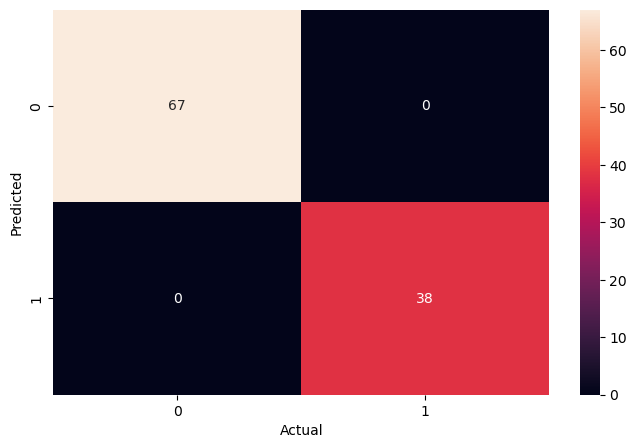

In [86]:
plt.figure(figsize=[8,5])
cm = confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### Classification report

In [87]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        38

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

